<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET EDA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Netflix Data Analysis
</h2>
</div>

The dataset consists of meta details about the movies and tv shows such as the title, director, and cast of the shows / movies. Details such as the release year, the rating, duration etc. As the first step, let's load the dataset, create some new features. In this kernel, I have analysed this dataset to find top insights and findings.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Step 1 - Importation of librairies and load the data</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation of librairies</h3>
</div>

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Load csv files</h3>
</div>

In [5]:
df = pd.read_csv('./data/netflix_nov2019.csv', sep= ',')

In [6]:
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


## Description of the Dataset

* show_id : the ID of the show
* title : the title of the show
* director : name of the show's director
* cast : the name of the actor
* country : country where

In [7]:
df.show_id.duplicated().sum()

0

In [9]:
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [10]:
df.rating.unique()

array(['TV-14', 'TV-G', 'TV-Y', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', nan], dtype=object)

In [14]:
df.release_year.nunique()

71

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5837 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [46]:
df.isna().sum()

show_id            0
title              0
director        1901
cast             556
country            0
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

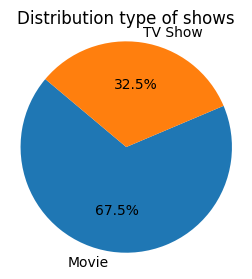

In [43]:
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(3, 3))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution type of shows')
plt.axis('equal')  

# Show plot
plt.show()

* 2/3rd of the content on netflix is movies and remaining 33% of them are TV Shows.

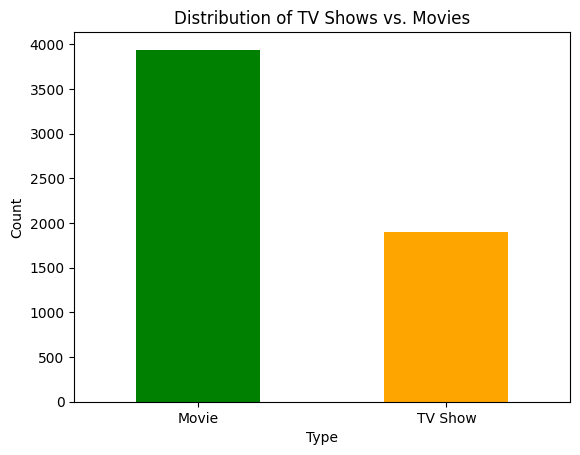

In [49]:

type_counts = df['type'].value_counts()

fig, ax = plt.subplots()
type_counts.plot(kind='bar', color=['green', 'orange'], ax=ax)
ax.set_title('Distribution of TV Shows vs. Movies')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##  3. Number of releases per country


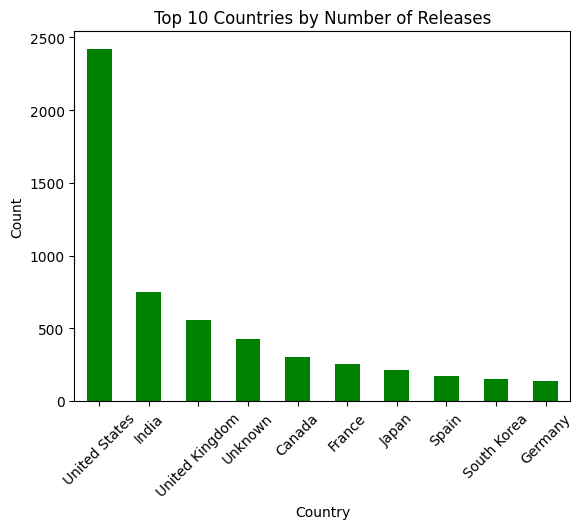

In [40]:
df['country'] = df['country'].fillna('Unknown')
country_counts = df['country'].str.split(', ').explode().value_counts().nlargest(10)

fig, ax = plt.subplots()
country_counts.plot(kind='bar', color='green', ax=ax)
ax.set_title('Top 10 Countries by Number of Releases')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

* The United States leads, followed by other countries like India and the United Kingdom.

## Top 10 Countries by Number of Releases